In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")
data.head(5)

id source_identifier published_date last_modified_date  \
0  CVE-1999-0095     cve@mitre.org     1988-10-01         2019-06-11   
1  CVE-1999-0082     cve@mitre.org     1988-11-11         2008-09-09   
2  CVE-1999-1471     cve@mitre.org     1989-01-01         2008-09-05   
3  CVE-1999-1122     cve@mitre.org     1989-07-26         2018-05-03   
4  CVE-1999-1467     cve@mitre.org     1989-10-26         2017-12-19   

     status                                        description  \
0  Modified  The debug command in Sendmail is enabled, allo...   
1  Analyzed      CWD ~root command in ftpd allows root access.   
2  Analyzed  Buffer overflow in passwd in BSD based operati...   
3  Modified  Vulnerability in restore in SunOS 4.0.3 and ea...   
4  Modified  Vulnerability in rcp on SunOS 4.0.x allows rem...   

                                          references  \
0  ['http://seclists.org/fulldisclosure/2019/Jun/...   
1  ['http://www.alw.nih.gov/Security/Docs/admin-g...   
2  ['http://www.cert.org/advisories/CA-1989-01.ht...   
3  ['http://www.cert.org/advisories/CA-1989-02.ht...   
4  ['http://www.cert.org/advisories/CA-1989-07.ht...   

                                      configurations         weaknesses  \
0  ['cpe:2.3:a:eric_allman:sendmail:5.58:*:*:*:*:...  ['NVD-CWE-Other']   
1  ['cpe:2.3:a:ftp:ftp:*:*:*:*:*:*:*:*', 'cpe:2.3...  ['NVD-CWE-Other']   
2  ['cpe:2.3:o:bsd:bsd:4.2:*:*:*:*:*:*:*', 'cpe:2...  ['NVD-CWE-Other']   
3  ['cpe:2.3:o:sun:sunos:*:*:*:*:*:*:*:*', 'cpe:2...  ['NVD-CWE-Other']   
4  ['cpe:2.3:o:sun:sunos:4.0:*:*:*:*:*:*:*', 'cpe...  ['NVD-CWE-Other']   

  v20_base_severity  ...  v30_base_severity v30_base_score  v30_vector_string  \
0              HIGH  ...                NaN            NaN                NaN   
1              HIGH  ...                NaN            NaN                NaN   
2              HIGH  ...                NaN            NaN                NaN   
3            MEDIUM  ...                NaN            NaN                NaN   
4              HIGH  ...                NaN            NaN                NaN   

   v30_exploitability_score v30_impact_score  v31_base_severity  \
0                       NaN              NaN                NaN   
1                       NaN              NaN                NaN   
2                       NaN              NaN                NaN   
3                       NaN              NaN                NaN   
4                       NaN              NaN                NaN   

  v31_base_score  v31_vector_string  v31_exploitability_score v31_impact_score  
0            NaN                NaN                       NaN              NaN  
1            NaN                NaN                       NaN              NaN  
2            NaN                NaN                       NaN              NaN  
3            NaN                NaN                       NaN              NaN  
4            NaN                NaN                       NaN              NaN  

[5 rows x 24 columns]

In [3]:
# % of missing data in each column
data.isna().sum()/len(data)*100

id                           0.000000
source_identifier            0.000000
published_date               0.000000
last_modified_date           0.000000
status                       0.000000
description                  0.000000
references                   0.000000
configurations               0.000000
weaknesses                   0.000000
v20_base_severity           22.871289
v20_base_score              22.871289
v20_vector_string           22.871289
v20_exploitability_score    22.871289
v20_impact_score            22.871289
v30_base_severity           78.202746
v30_base_score              78.202746
v30_vector_string           78.202746
v30_exploitability_score    78.202746
v30_impact_score            78.202746
v31_base_severity           54.857070
v31_base_score              54.857070
v31_vector_string           54.857070
v31_exploitability_score    54.857070
v31_impact_score            54.857070
dtype: float64

In [4]:
# we use v2.0 score because % of lacking data
# Convert datetime
data["published_date"] = pd.to_datetime(data["published_date"])
data["last_modified_date"] = pd.to_datetime(data["last_modified_date"])

In [5]:
#create year column
year_list=[]
for i in range(0,len(data["id"])):
    a=data["published_date"][i].year
    year_list.append(a)

data.insert(loc=2, column='year', value=year_list)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236305 entries, 0 to 236304
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        236305 non-null  object        
 1   source_identifier         236305 non-null  object        
 2   year                      236305 non-null  int64         
 3   published_date            236305 non-null  datetime64[ns]
 4   last_modified_date        236305 non-null  datetime64[ns]
 5   status                    236305 non-null  object        
 6   description               236305 non-null  object        
 7   references                236305 non-null  object        
 8   configurations            236305 non-null  object        
 9   weaknesses                236305 non-null  object        
 10  v20_base_severity         182259 non-null  object        
 11  v20_base_score            182259 non-null  float64       
 12  v2

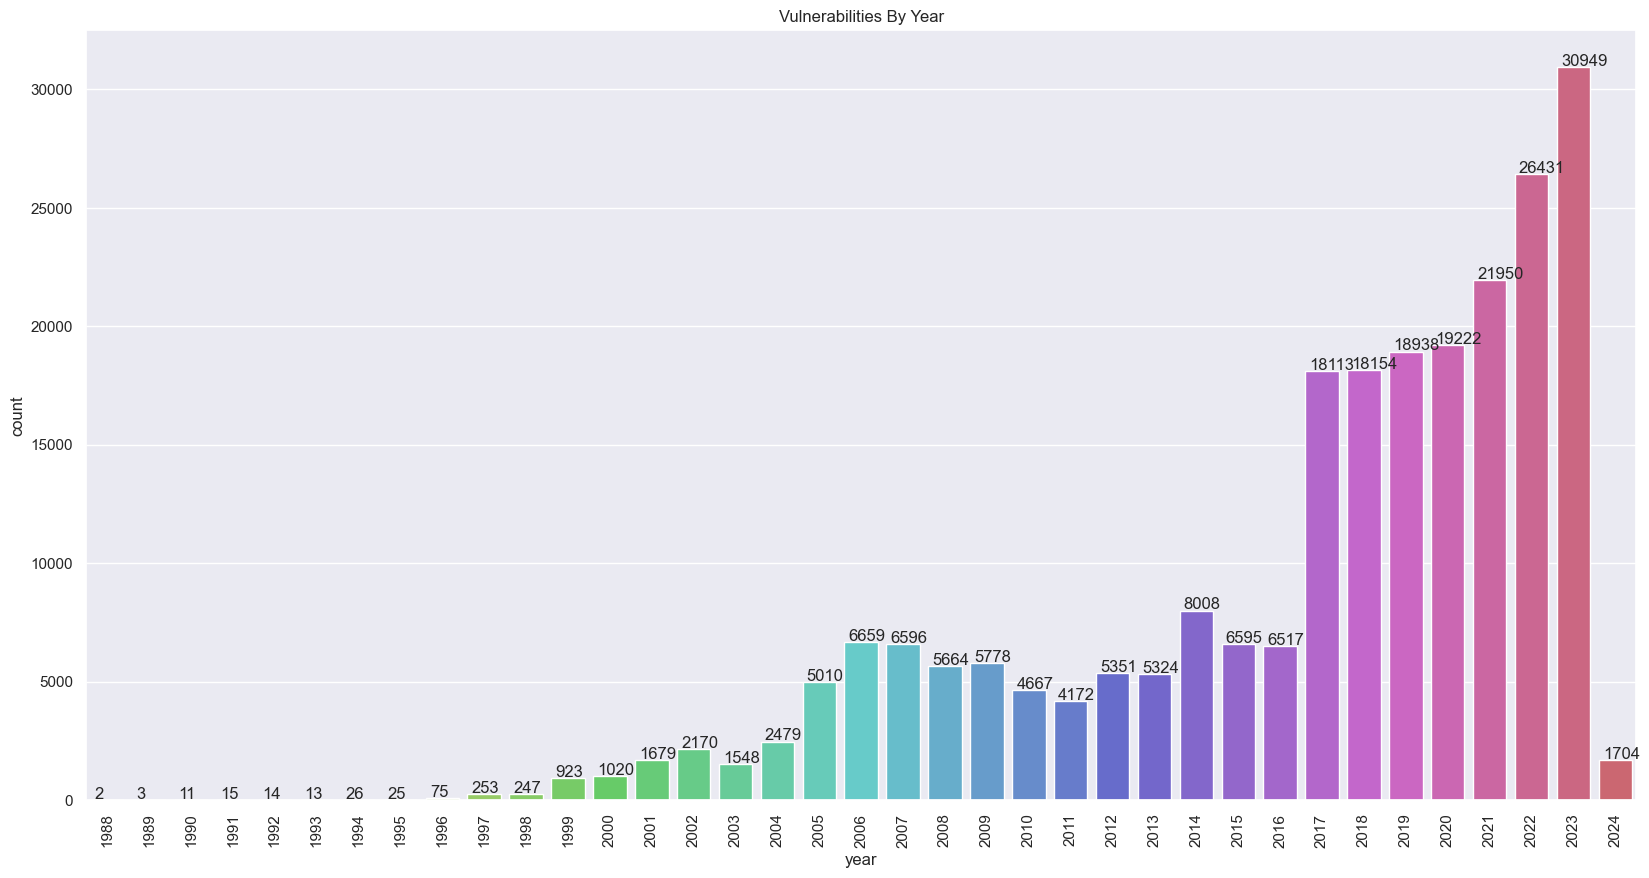

In [6]:
#the number of vulnerabilities reported by year.
plt.rcParams["figure.figsize"] = (20,10)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="year", data=data,palette="hls")
ax.set_title("Vulnerabilities By Year")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)
plt.show()

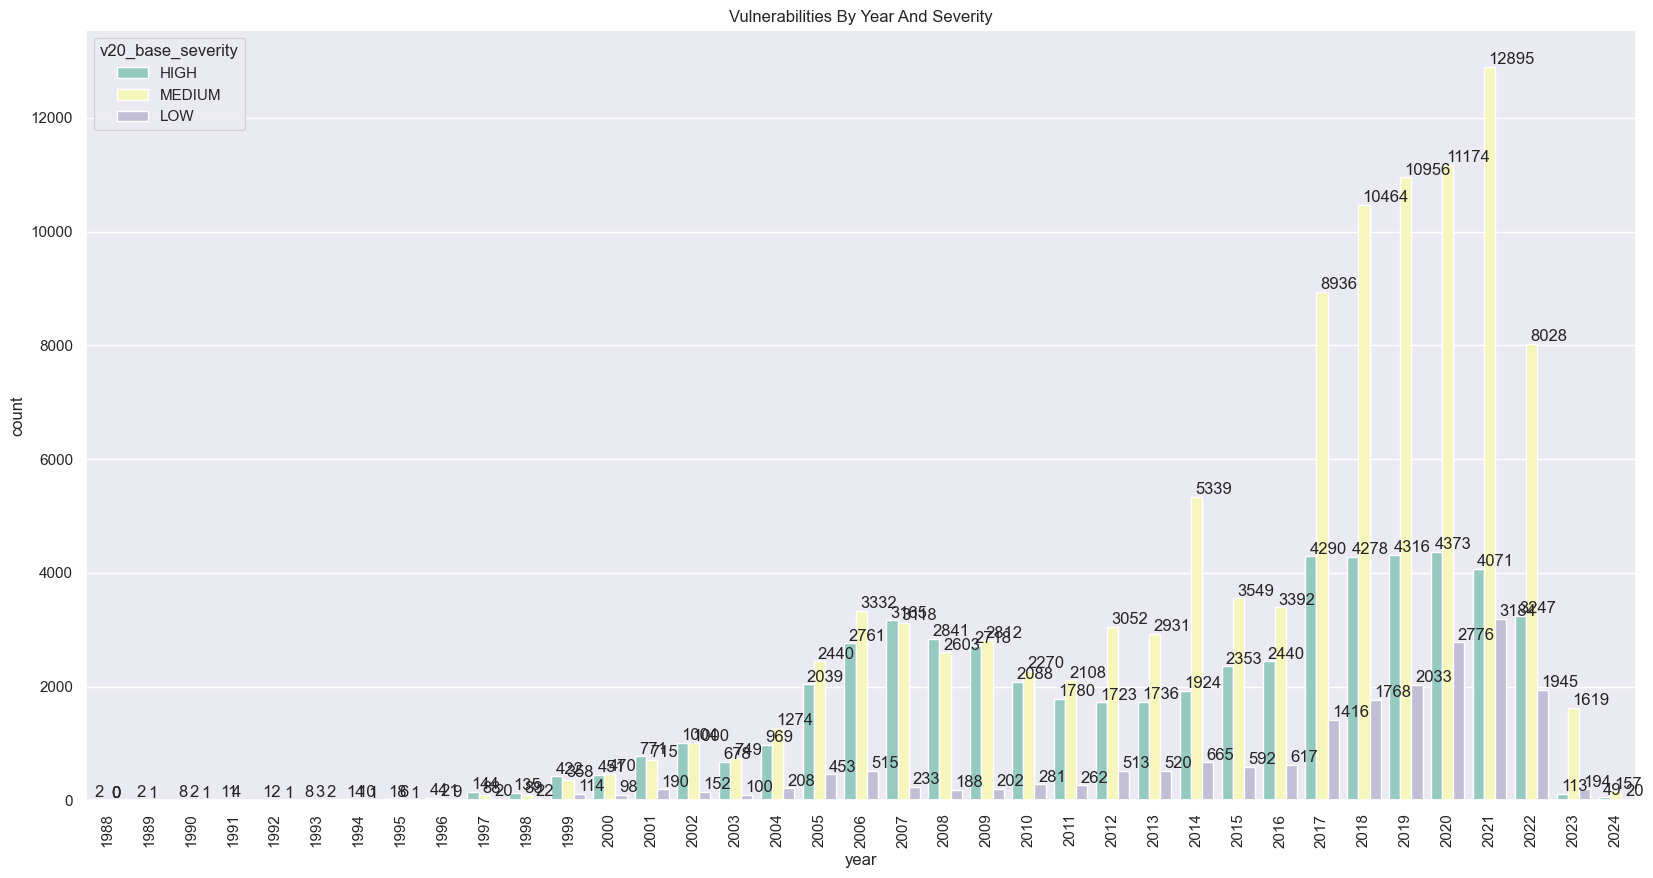

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="year", data=data,palette="Set3",hue="v20_base_severity")
ax.set_title("Vulnerabilities By Year And Severity")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)
plt.show()

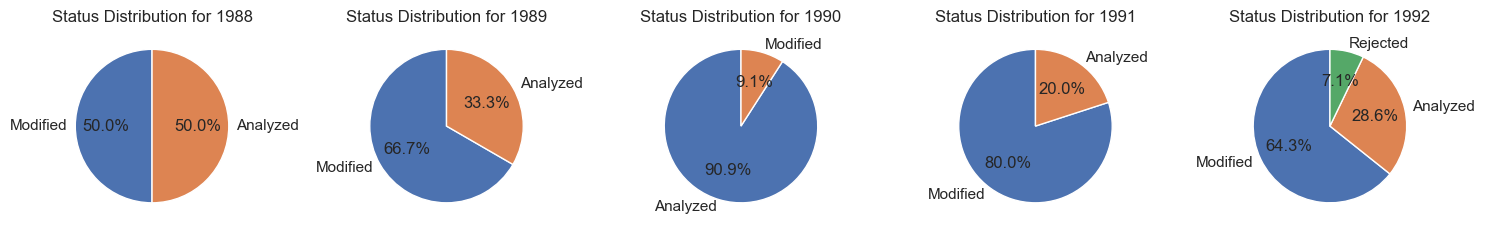

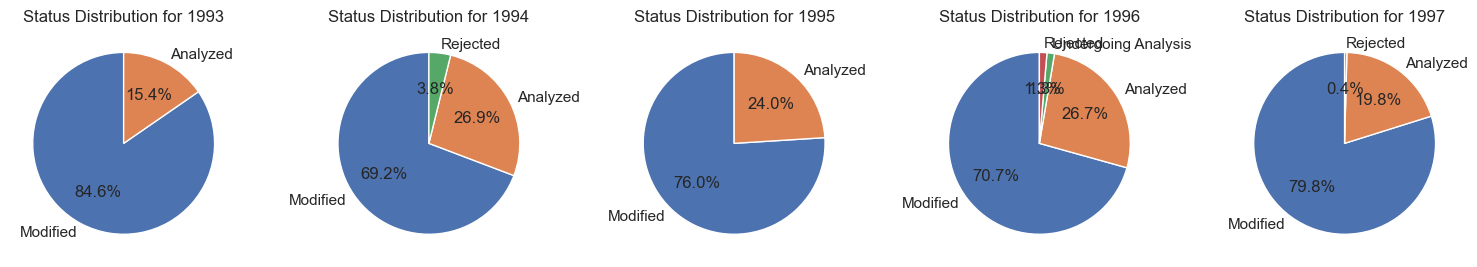

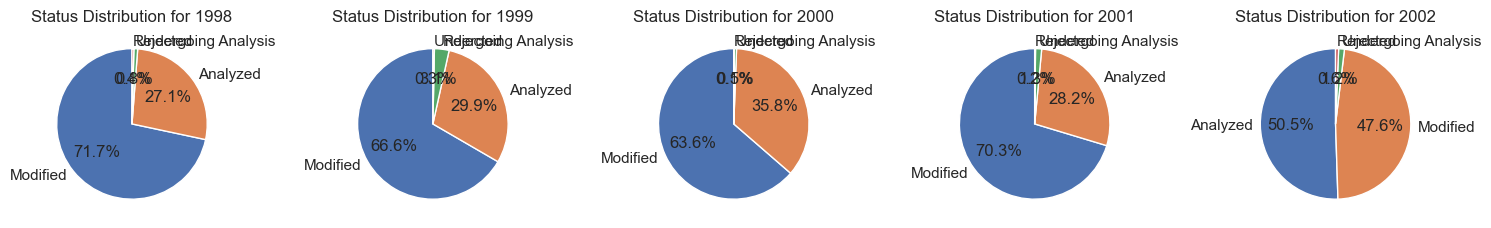

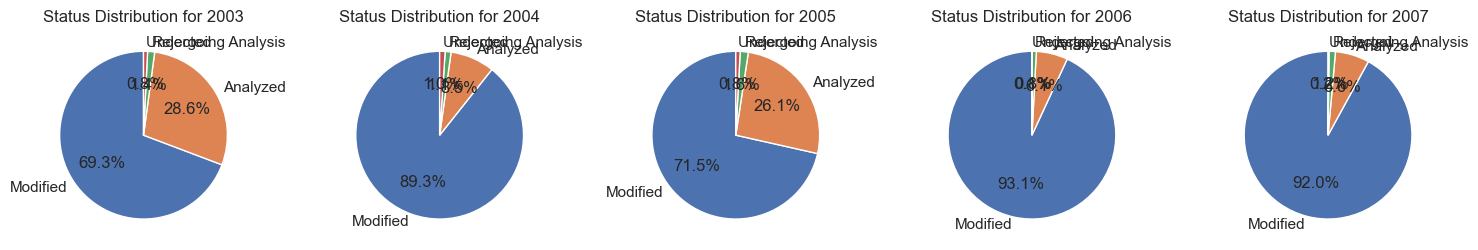

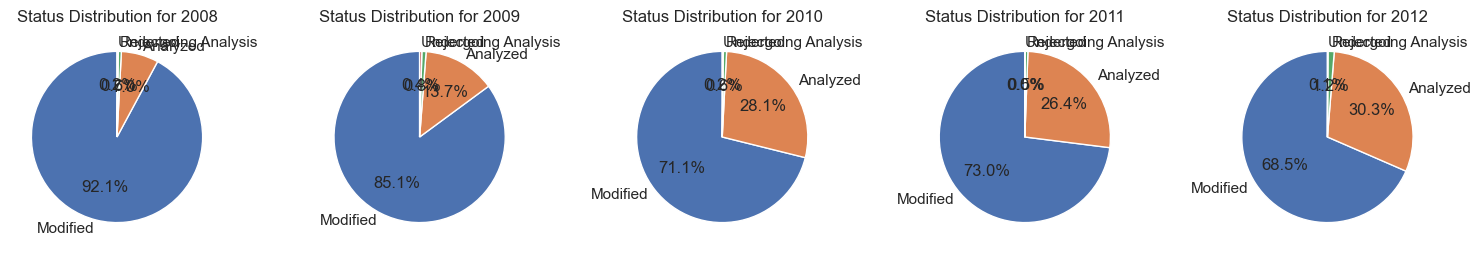

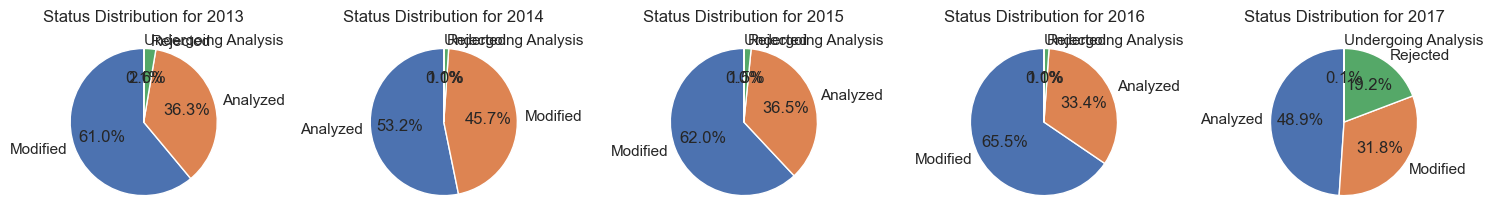

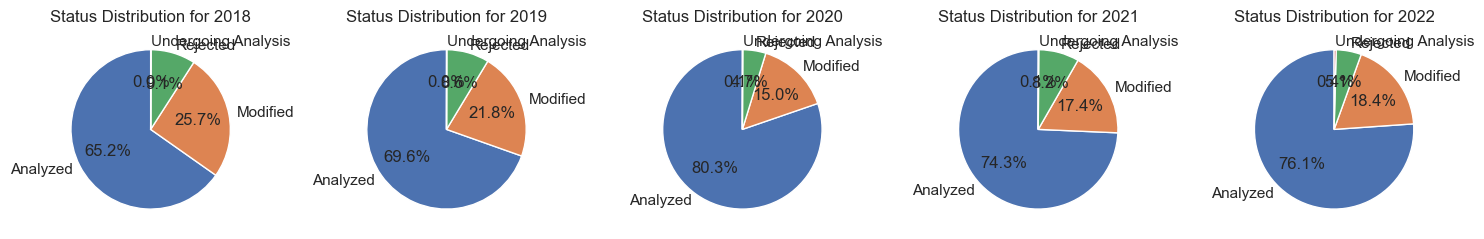

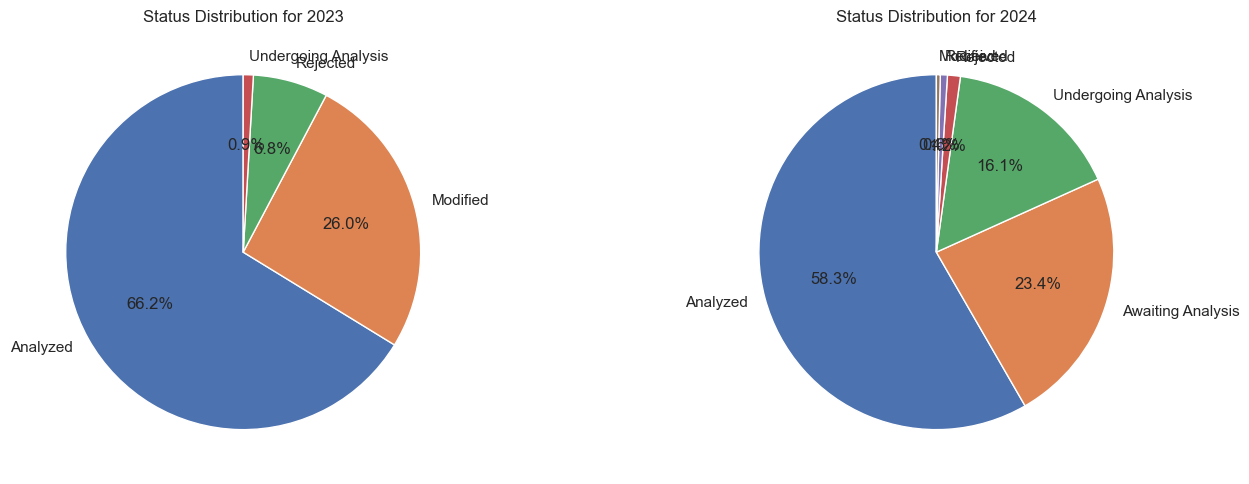

In [16]:
#status every year
unique_years = data['year'].unique()
num_years = len(unique_years)

subplots_per_figure = 5
num_figures = (num_years - 1) // subplots_per_figure + 1

for fig_num in range(num_figures):

    start_year = fig_num * subplots_per_figure
    end_year = min((fig_num + 1) * subplots_per_figure, num_years)

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=1, ncols=end_year - start_year, figsize=(15, 5))

    for i, year in enumerate(unique_years[start_year:end_year]):
        subset_df = data[data['year'] == year]
        status_counts = subset_df['status'].value_counts()

        # Plot the pie chart for each year
        axes[i].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Status Distribution for {year}')

    plt.tight_layout()
    plt.show()

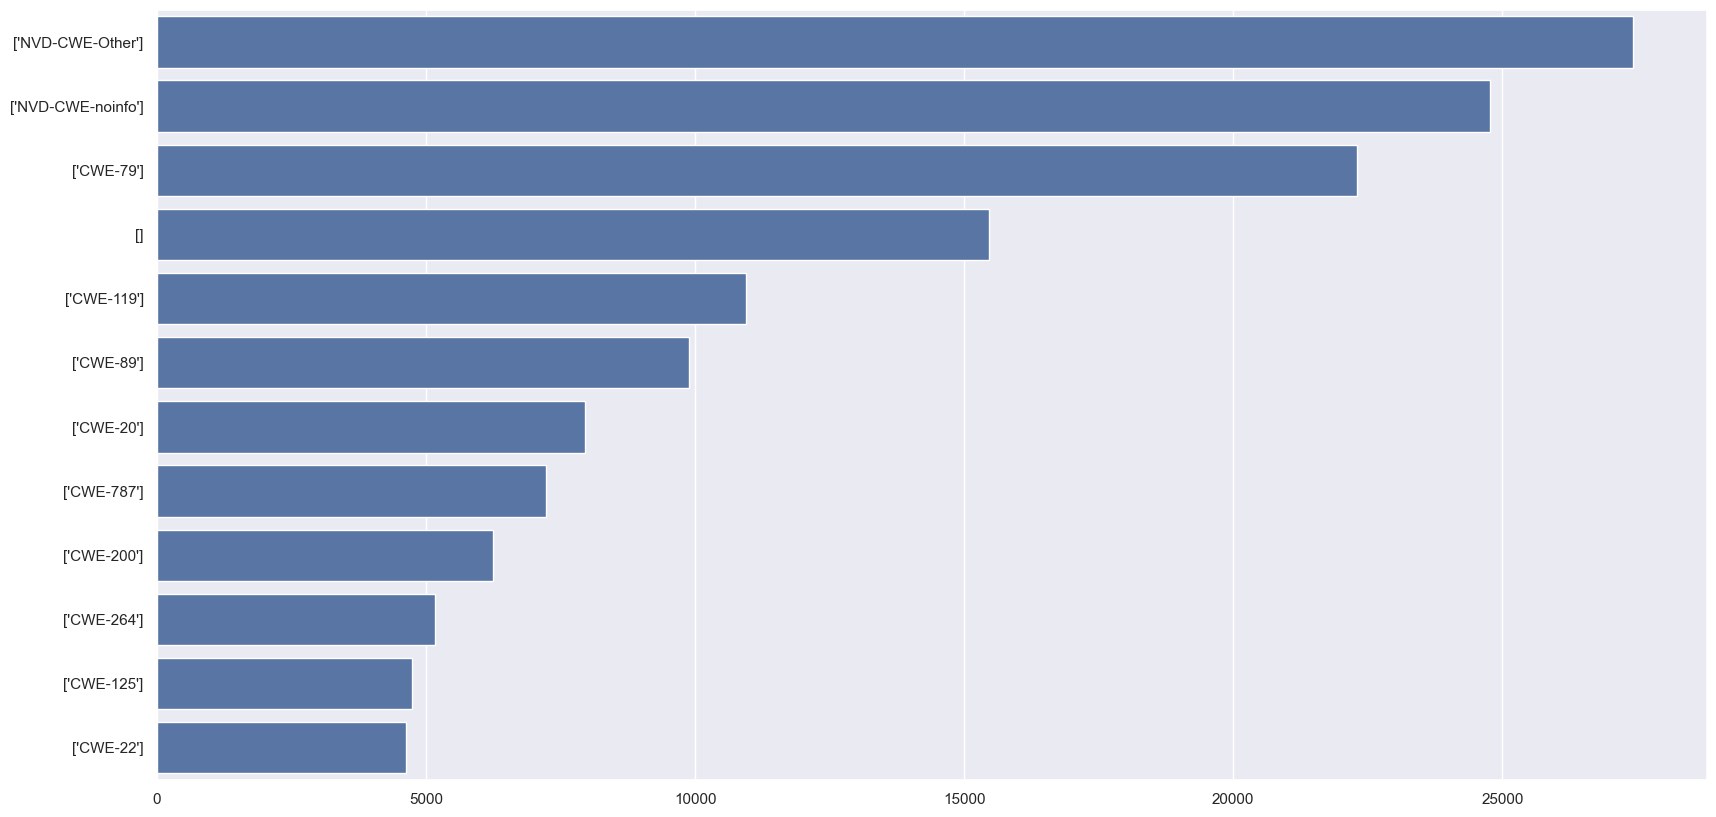

In [19]:
# Finding Prominent CWE

from collections import Counter

cwe_counter = dict(sorted(dict(Counter(data["weaknesses"])).items(), key=lambda x: x[-1], reverse=True))

sns.barplot(x=list(cwe_counter.values())[:12], y=list(cwe_counter.keys())[:12])
plt.show()

In [36]:
fig = px.histogram(
    data,
    x="v20_base_score",
    histfunc='avg',
    y="year",
    orientation='h',
    height=700,
    width=1500,
    text_auto='.2s',
    title="Average CVSS-V2 Score by Year",
    color="year",  # Add color based on the year for better differentiation
    color_discrete_sequence=px.colors.qualitative.Set3,  # Use a qualitative color palette
    labels={"v20_base_score": "Average CVSS-V2 Score", "year": "Year"}
)

# Update the layout for better visibility
fig.update_layout(
    showlegend=False,  # Hide legend for better clarity
    xaxis_title="Average CVSS-V2 Score",
    yaxis_title="Year",
    font=dict(family="Arial", size=12, color="RebeccaPurple"),  # Adjust font style
)

# Update the traces for better visibility
fig.update_traces(
    marker_line_color='rgb(8, 48, 107)',
    marker_line_width=1.5,
    opacity=0.8,
)

fig.show()

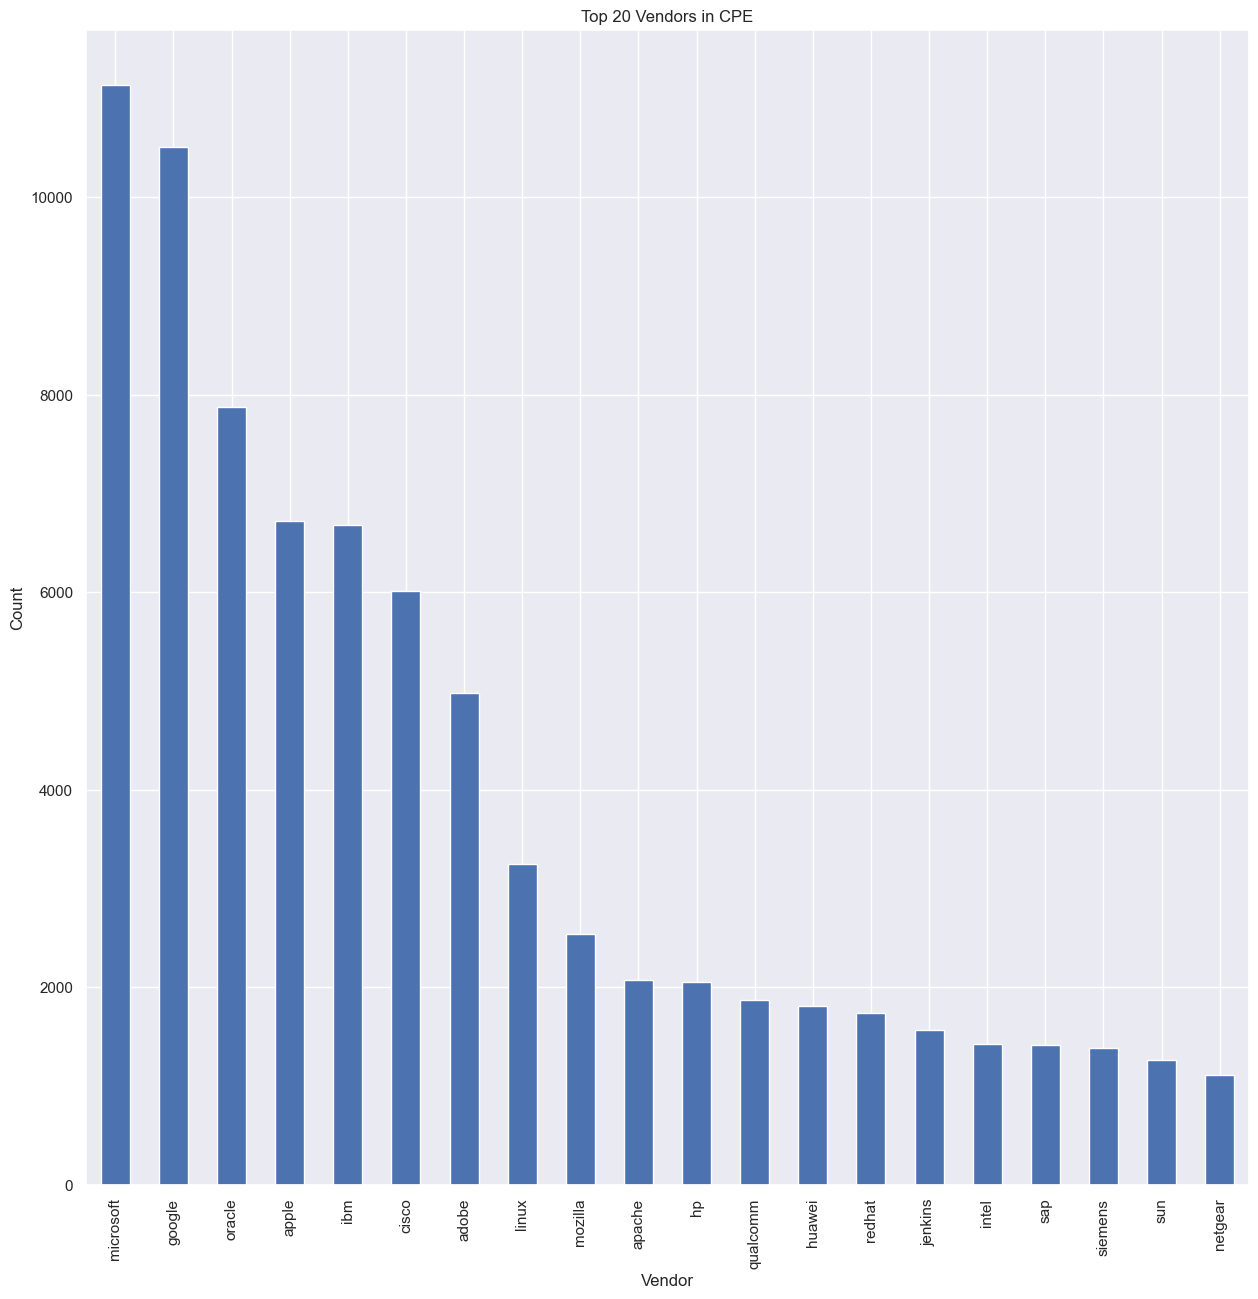

In [47]:
df_exploded = data.explode('configurations')

# Extract vendor information from configurations with error handling
def extract_vendor(config):
    try:
        return config.split(':')[3]
    except IndexError:
        return None

df_exploded['vendor'] = df_exploded['configurations'].apply(extract_vendor)

# Get the top 20 vendors
top_20_vendors = df_exploded['vendor'].value_counts().nlargest(20)

top_20_vendors.plot(kind='bar')
plt.xlabel('Vendor')
plt.ylabel('Count')
plt.title('Top 20 Vendors in CPE')
plt.show()

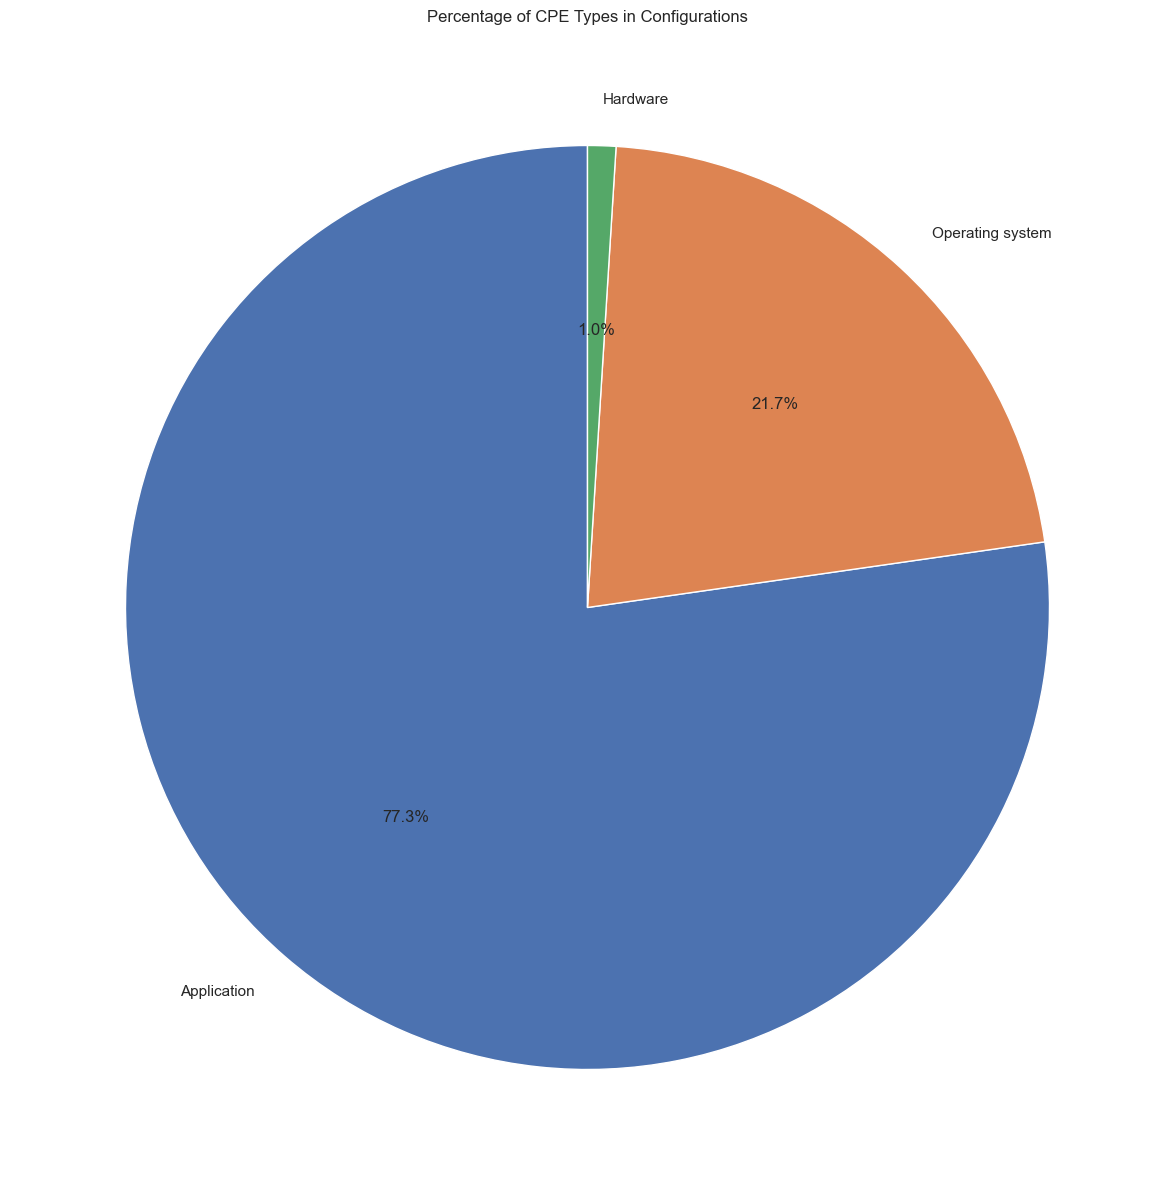

In [49]:
# type of cpe:
# a: Application
# h: Hardware
# o: Operating system

def extract_cpe_type(config):
    try:
        cpe_type = config.split(':')[2]
        type_mapping = {'a': 'Application', 'h': 'Hardware', 'o': 'Operating system'}
        return type_mapping.get(cpe_type, cpe_type)
    except IndexError:
        return None

df_exploded['cpe_type'] = df_exploded['configurations'].apply(extract_cpe_type)
cpe_type_counts = df_exploded['cpe_type'].value_counts()

# Plot the pie chart
plt.pie(cpe_type_counts, labels=cpe_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of CPE Types in Configurations')
plt.show()

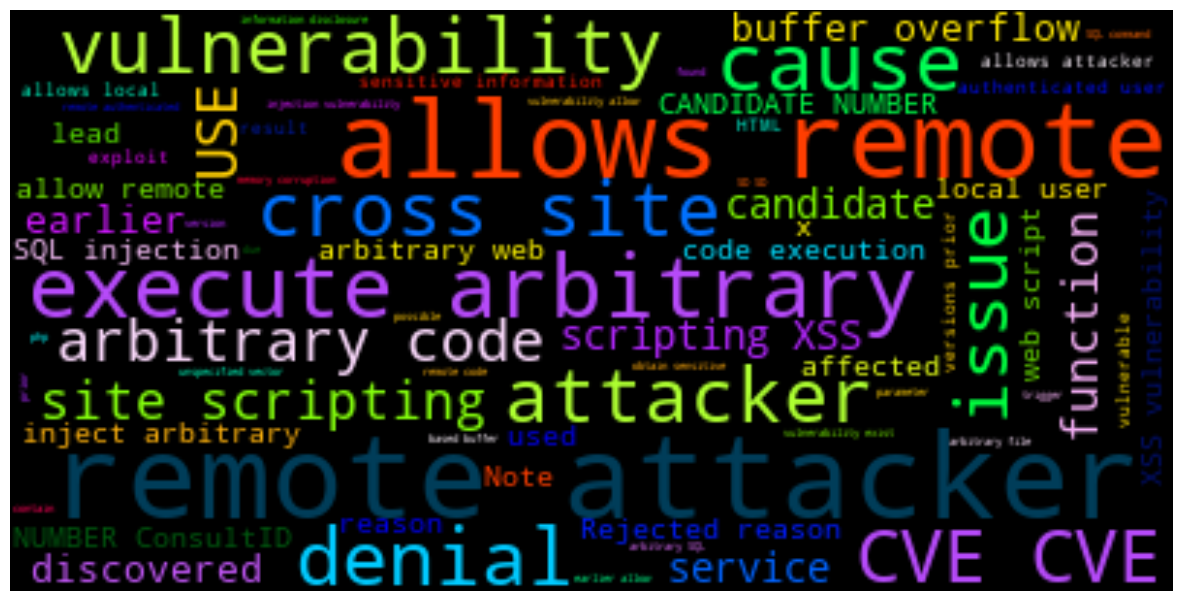

In [33]:
#the most used words in the "description" column of the dataset.
text = " ".join(desc for desc in data["description"])
stopwords = set(STOPWORDS)
stopwords.update(["will", "announcing", "via", "none"])

wordcloud = WordCloud(
    background_color='black',
    colormap="gist_ncar",
    contour_width=1,
    stopwords=stopwords,
    contour_color="black"
).generate(text)

plt.rcParams["figure.figsize"] = (15, 15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
github_links = data['references'].apply(lambda x: re.findall(r'https?://github\.com/[\w-]+/[\w-]+', x))

# Flatten the list of GitHub links
flat_github_links = [link for sublist in github_links for link in sublist]

# Display the extracted GitHub links
print("GitHub Links: ",len(flat_github_links))

GitHub Links:  52328
